In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
target_map = {'Iris-setosa':0, 
              'Iris-versicolor':1,
              'Iris-virginica':2 }
# Use the pandas apply method to numerically encode our attrition target variable
df['Species'] = df['Species'].apply(lambda x: target_map[x])


In [6]:
df["SepalLengthCm"].max()

7.9

In [7]:
X_df = df.drop(["Id","Species"],axis=1)
y_df = df["Species"]
X = X_df.values
y = y_df.values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [9]:
y_train

array([1, 0, 2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 0,
       1, 2])

In [10]:
step = 0.5
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
## A and B is for 3rd and 4th columns used in predict_proba, but not graphed
A_min, A_max = X[:, 2].min() - .5, X[:, 2].max() + .5
B_min, B_max = X[:, 3].min() - .5, X[:, 3].max() + .5
xx, yy,aa,bb = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step),
                     np.arange(A_min, A_max, step),
                     np.arange(B_min, B_max, step))


In [11]:
xx.shape

(7, 10, 14, 7)

In [12]:
figure = plt.figure(figsize=(6, 6))

<Figure size 432x432 with 0 Axes>

Text(0, 0.5, 'Sepal Width')

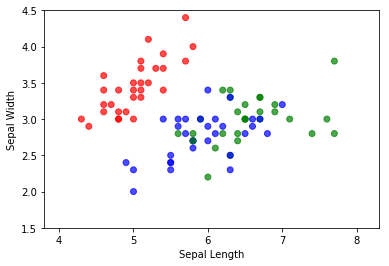

In [13]:
# just plot the dataset first
cm = plt.cm.jet
cm_bright = ListedColormap(['#FF0000', '#0000FF','green'])
ax = plt.subplot()
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.7)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
#ax.set_xticks(())
#ax.set_yticks(())

In [14]:
def train_model(x_train,y_train,layer_shape,optimizer):
    # layer shape is in a python list [20,20,20]
    #solver options => solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
    model = MLPClassifier(hidden_layer_sizes=(layer_shape), max_iter=6000, alpha=0.000000001,
                         solver=optimizer, verbose=False,random_state=21,tol=0.000000001,learning_rate="adaptive")
    model.fit(x_train, y_train)
    return model

In [15]:
#optimizer options => solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’ for MLPClassifier and regressor
optimizer = 'adam'
layer_shape = [30,30]
clf = train_model(X_train,y_train,layer_shape,optimizer)


In [16]:
score = clf.score(X_test, y_test)

In [26]:
print(xx.ravel().shape)
print(yy.ravel().shape)
print(aa.ravel().shape)
print(bb.ravel().shape)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel(), aa.ravel(), bb.ravel()])[:, 1]
print("Z:",Z.shape)
Z = Z.reshape(xx.shape)
Z.shape

(6860,)
(6860,)
(6860,)
(6860,)
Z: (6860,)


(7, 10, 14, 7)

xx_plt: (14, 49) yy_plt: (14, 49) Z_plt: (14, 49)


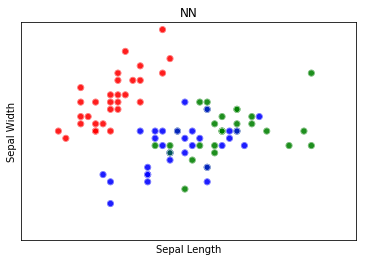

In [18]:
# just plot the dataset first
cm = plt.cm.jet
cm_bright = ListedColormap(['#FF0000', '#0000FF','green'])
ax = plt.subplot()
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.7)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    #Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel(), aa.ravel(), bb.ravel()])[:, 1]

# Put the result into a color plot
# Z has 4 columns need to reduce to 2 (i.e. 2d array)
# xx has 4 columns need to reduce to 2 (i.e. 2d array)
# yy has 4 columns need to reduce to 2 (i.e. 2d array)
Z = Z.reshape(xx.shape)

Z_plt = np.column_stack((Z[:,2]))
xx_plt = np.column_stack((xx[:,2]))
yy_plt = np.column_stack((yy[:,2]))
print("xx_plt:",xx_plt.shape,"yy_plt:",yy_plt.shape,"Z_plt:",Z_plt.shape)
#print(xx_plt)
ax.contourf(xx_plt, yy_plt, Z_plt, cmap=plt.cm.jet, alpha=0.8)

# Plot also the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.6, linewidths=0.6, edgecolors="white")
# and testing points
#ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           #alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("NN")
#ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
#        size=15, horizontalalignment='right')

figure.subplots_adjust(left=.02, right=.98)
plt.show()